In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score


In [93]:

data = pd.read_csv("auto-mpg.csv")

In [94]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [95]:
data.shape

(398, 9)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [97]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [98]:
data[data.horsepower.str.isdigit()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [99]:
data['horsepower'] = data['horsepower'].replace('?',np.nan)

In [100]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [101]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())

In [102]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [103]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [104]:
data['horsepower'] = data['horsepower'].astype('float64')

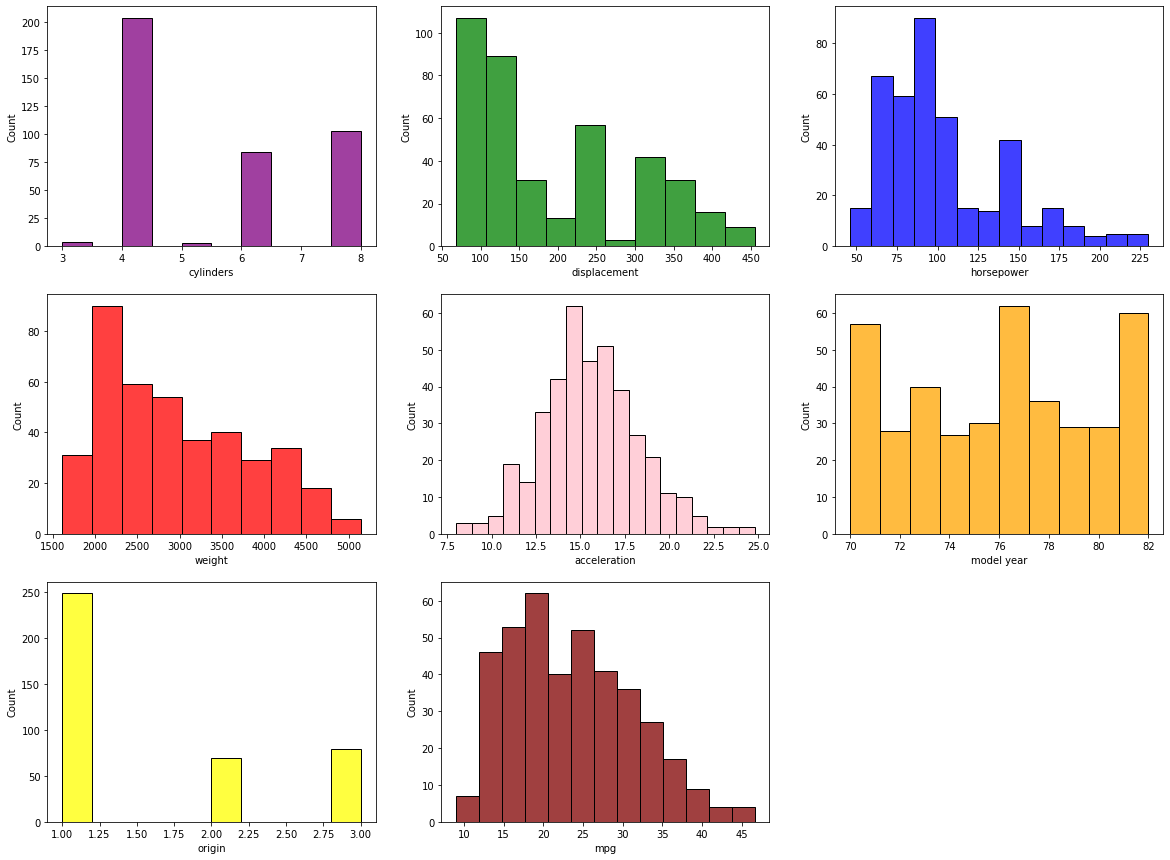

In [105]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.histplot(data['cylinders'],color='purple')

plt.subplot(3,3,2)
sns.histplot(data['displacement'],color='green')

plt.subplot(3,3,3)
sns.histplot(data['horsepower'],color='blue')

plt.subplot(3,3,4)
sns.histplot(data['weight'],color='red')

plt.subplot(3,3,5)
sns.histplot(data['acceleration'],color='pink')

plt.subplot(3,3,6)
sns.histplot(data['model year'],color='orange')

plt.subplot(3,3,7)
sns.histplot(data['origin'],color='yellow')

plt.subplot(3,3,8)
sns.histplot(data['mpg'],color='maroon');

In [106]:
data.corr().T

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


## Data Preprocesing

In [107]:
data = data.drop('car name',axis=1)

In [108]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


## seperate the dependant nad independant variables

In [109]:
X = data.drop('mpg',axis=1) # all except mgp
y = data[['mpg']]

In [121]:
# scale all the columns of data .This will give a numpy array
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled,columns=y.columns)



In [111]:
# train test split

from sklearn.model_selection import train_test_split

X_train,x_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size=0.30,random_state=1)

In [112]:
print('X_train',X_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (278, 7)
x_test (120, 7)
y_train (278, 1)
y_test (120, 1)


#### Build Linear Regression Model

In [113]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coeefient for {} is {}".format(col_name,regression_model.coef_[0][idx]))

The coeefient for cylinders is -0.08561436895562707
The coeefient for displacement is 0.30441822535930246
The coeefient for horsepower is -0.09718466302484263
The coeefient for weight is -0.7628632829136761
The coeefient for acceleration is 0.021591275172924626
The coeefient for model year is 0.3749408074118714
The coeefient for origin is 0.12302637024556856


In [114]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.0128331282939929


#### Ridge regression

In [115]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
for i,col in enumerate(X_train.columns):
    print("The coeefient for {} is {}".format(col,ridge.coef_[0][idx]))

The coeefient for cylinders is 0.1221271728580032
The coeefient for displacement is 0.1221271728580032
The coeefient for horsepower is 0.1221271728580032
The coeefient for weight is 0.1221271728580032
The coeefient for acceleration is 0.1221271728580032
The coeefient for model year is 0.1221271728580032
The coeefient for origin is 0.1221271728580032


#### Lasso Regression

In [116]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print("The coeefient for {} is {}".format(col,lasso.coef_[i]))

The coeefient for cylinders is -0.0
The coeefient for displacement is -0.0
The coeefient for horsepower is -0.013280002937314536
The coeefient for weight is -0.6205207866794482
The coeefient for acceleration is 0.0
The coeefient for model year is 0.29198732924913484
The coeefient for origin is 0.021567653979880638


#### Compare the Score

In [117]:
print(regression_model.score(X_train,y_train))
print(regression_model.score(x_test,y_test))

0.8081802739111359
0.8472274567567305


In [118]:
print(ridge.score(X_train,y_train))
print(ridge.score(x_test,y_test))

0.8081651504849107
0.8475401122140553


In [119]:
print(lasso.score(X_train,y_train))
print(lasso.score(x_test,y_test))

0.7853770917055521
0.8277658025171161
